In [ ]:
DECLARE
  emp_salary NUMBER;
  emp_count NUMBER;
BEGIN
  -- Too Many Rows
  SELECT COUNT(*) INTO emp_count FROM hr.employees;
  IF(emp_count > 1) THEN
    RAISE_APPLICATION_ERROR(-20100, 'Too Many Rows');
  END IF;

  -- No Data Found
  SELECT salary INTO emp_salary FROM hr.employees WHERE employee_id = 9999;
  IF(emp_salary IS NULL) THEN
    RAISE_APPLICATION_ERROR(-20101, 'No Data Found');
  END IF;
END;


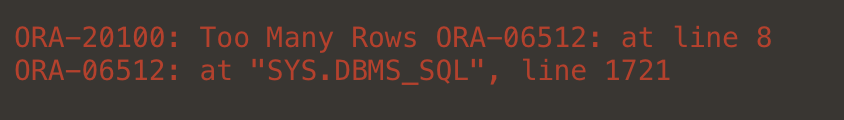

Write a PL/SQL code to display a message to check whether the record is deleted or not.

In [ ]:
DECLARE
  emp_id employees.employee_id%TYPE:= 234;
BEGIN
  DELETE FROM employees WHERE employee_id = emp_id;
  IF(SQL%ROWCOUNT = 1) THEN
    DBMS_OUTPUT.PUT_LINE('Record Deleted Successfully');
  ELSE
    DBMS_OUTPUT.PUT_LINE('Record Not Found');
  END IF;
END;


Write a PL/SQL code to display a message to provide the information about the number of records deleted by the delete statement issued in a PL/SQL block.
Cursor EMP (empno, ename, job, sal, deptno)

In [ ]:
DECLARE
  emp_count NUMBER;
BEGIN
  DELETE FROM employees WHERE department_id = 10;
  emp_count := SQL%ROWCOUNT;
  DBMS_OUTPUT.PUT_LINE('Total ' || emp_count || ' records deleted');
END;


Write a PL/SQL code to demonstrate %TYPE and %ROWTYPE to display details of employees in EMP table.

In [ ]:
DECLARE
  emp employees%ROWTYPE;
BEGIN
  SELECT * INTO emp FROM employees WHERE employee_id = 100;
  DBMS_OUTPUT.PUT_LINE('Employee Details:');
  DBMS_OUTPUT.PUT_LINE('Employee ID: ' || emp.employee_id);
  DBMS_OUTPUT.PUT_LINE('Employee Name: ' || emp.first_name || ' ' || emp.last_name);
  DBMS_OUTPUT.PUT_LINE('Job: ' || emp.job_id);
  DBMS_OUTPUT.PUT_LINE('Salary: ' || emp.salary);
  DBMS_OUTPUT.PUT_LINE('Department ID: ' || emp.department_id);
END;


Write a PL/SQL code to display the empno, ename, job of employees of department number 10 for EMP table (using Cursor).

In [ ]:
DECLARE
  CURSOR emp_cursor IS
    SELECT employee_id, first_name, last_name, job_id
    FROM employees
    WHERE department_id = 10;
BEGIN
  DBMS_OUTPUT.PUT_LINE('Employee Details:');
  FOR emp IN emp_cursor LOOP
    DBMS_OUTPUT.PUT_LINE('Employee ID: ' || emp.employee_id);
    DBMS_OUTPUT.PUT_LINE('Employee Name: ' || emp.first_name || ' ' || emp.last_name);
    DBMS_OUTPUT.PUT_LINE('Job: ' || emp.job_id);
    DBMS_OUTPUT.PUT_LINE('-----------------------');
  END LOOP;
END;


Write a PL/SQL code to display the employee number and name of top 5 highest paid Employees (using Cursor).

In [ ]:
DECLARE
  CURSOR emp_cursor IS
    SELECT employee_id, first_name || ' ' || last_name AS emp_name, salary
    FROM employees
    ORDER BY salary DESC
    FETCH FIRST 5 ROWS ONLY;
BEGIN
  DBMS_OUTPUT.PUT_LINE('Top 5 highest paid Employees:');
  FOR emp IN emp_cursor LOOP
    DBMS_OUTPUT.PUT_LINE('Employee ID: ' || emp.employee_id);
    DBMS_OUTPUT.PUT_LINE


Write a PL/SQL code to calculate the total salary of first n records of emp table. The value of n is passed to cursor as parameter 

In [ ]:
DECLARE
  n NUMBER := 5;
  total_salary NUMBER := 0;
  CURSOR emp_cursor IS 
    SELECT salary FROM emp WHERE ROWNUM <= n;
BEGIN
  FOR emp_record IN emp_cursor LOOP
    total_salary := total_salary + emp_record.salary;
  END LOOP;
  DBMS_OUTPUT.PUT_LINE('Total salary of first ' || n || ' employees is: ' || total_salary);
END;
